<a href="https://colab.research.google.com/github/ananthakrishnanpta/Linear_regression/blob/main/Linear_regression_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [339]:
import pandas as pd
import numpy as np

import warnings 
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes = True)
from sklearn import preprocessing


# Loading dataset file

In [369]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/linear_pra/SeoulBikeData.csv")


# Checking dimensions of dataset

In [341]:
print("Dimension of the dataset is ",data.shape)

Dimension of the dataset is  (8760, 14)


In [342]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [343]:
# df = data.select_dtypes(include=['float64','int64'])
df = data

df.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [344]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [345]:
df.describe()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [346]:
# data.drop(['Solar Radiation (MJ/m2)'],axis = 1, inplace = True)

In [347]:
data.drop(['Holiday'],axis = 1, inplace = True) #no useful data

# Encoding text data

In [348]:
# df['Functioning Day'].replace(to_replace=['Yes','no'],value=[1,0], inplace=True)
# df['Seasons'].value_counts()
# df['Seasons'].unique()

label_encode = preprocessing.LabelEncoder()
df = data.apply(label_encode.fit_transform)
df.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Functioning Day
0,11,253,0,111,28,22,1788,114,0,0,0,3,1
1,11,203,1,108,29,8,1788,114,0,0,0,3,1
2,11,172,2,103,30,10,1788,113,0,0,0,3,1
3,11,106,3,101,31,9,1788,114,0,0,0,3,1
4,11,77,4,103,27,23,1788,104,0,0,0,3,1


# Checking for missing values

In [349]:
miss_val = df.isna().sum()
miss_val

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Functioning Day             0
dtype: int64

In [350]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Functioning Day'],
      dtype='object')

# Checking for outliers using boxplot

In [351]:
def plot_box(df,col_name):
  plt.figure(figsize = (5,5))
  sns.boxplot(df[col_name])
  plt.show()
def remove_outliers(df,col_name):
  print("Box plot before removing outliers: ")
  plot_box(df,col_name)

  q1, q2, q3 = np.percentile(df[col_name],[25,50,75])
  int_quart_range = q3 - q1
  df = df[df[col_name] > (q1 - (int_quart_range * 1.5))]
  df = df[df[col_name] <(q3 + (int_quart_range *1.5))]
  
  print("Box plot after removing outliers: ")
  plot_box(df,col_name)
  return df

Box plot before removing outliers: 


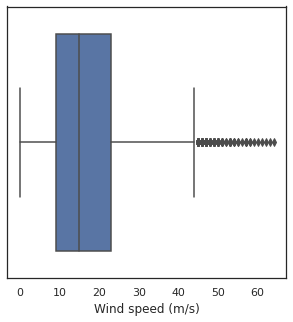

Box plot after removing outliers: 


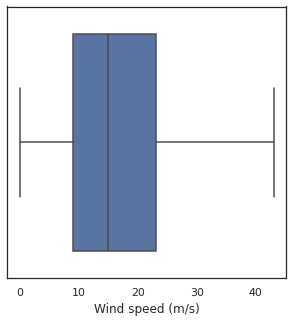

In [352]:
df = remove_outliers(df,'Wind speed (m/s)')

Box plot before removing outliers: 


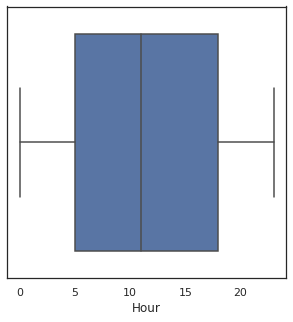

Box plot after removing outliers: 


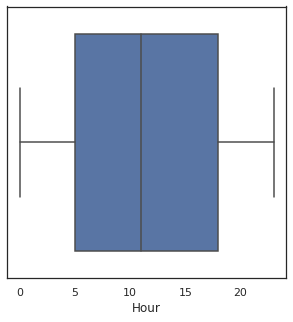

In [353]:
df = remove_outliers(df,'Hour')

In [354]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Functioning Day'],
      dtype='object')

Box plot before removing outliers: 


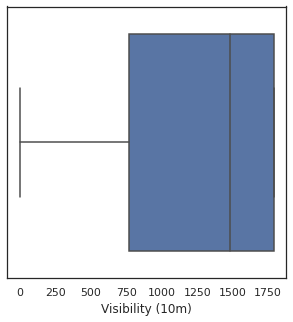

Box plot after removing outliers: 


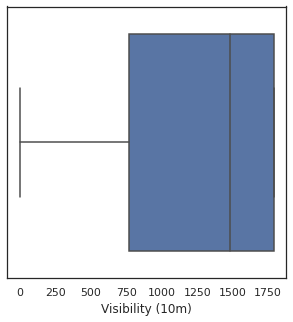

In [355]:
# df = remove_outliers(df,'Temperature(C)')
# df = remove_outliers(df,'Humidity(%)')
df = remove_outliers(df,'Visibility (10m)')
# df = remove_outliers(df,'Humidity(%)')
# df = remove_outliers(df,'Humidity(%)')
# df = remove_outliers(df,'Humidity(%)')
# df = remove_outliers(df,'Humidity(%)')

# Checking Correlation

In [356]:
data_corr = df.corr()
data_corr

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Functioning Day
Date,1.000000,0.028843,0.002747,0.017122,-0.031853,-0.012789,-0.096911,0.000052,0.003994,-0.011648,0.107026,-0.016438,0.072261
Rented Bike Count,0.028843,1.000000,0.419888,0.554535,-0.213383,0.148777,0.203493,0.390193,0.288858,-0.182435,-0.153492,-0.264631,0.217873
Hour,0.002747,0.419888,1.000000,0.128222,-0.241666,0.289811,0.097024,0.007714,0.144612,-0.002127,-0.021139,-0.001869,0.003992
Temperature(C),0.017122,0.554535,0.128222,1.000000,0.151053,-0.013300,0.040644,0.912866,0.363084,0.058943,-0.226807,-0.326484,-0.048438
Humidity(%),-0.031853,-0.213383,-0.241666,0.151053,1.000000,-0.331085,-0.538687,0.530465,-0.457473,0.325937,0.108529,-0.116567,-0.021038
Wind speed (m/s),-0.012789,0.148777,0.289811,-0.013300,-0.331085,1.000000,0.167269,-0.153364,0.327954,-0.039656,-0.007077,0.107323,0.008071
Visibility (10m),-0.096911,0.203493,0.097024,0.040644,-0.538687,0.167269,1.000000,-0.169029,0.141169,-0.226393,-0.123756,-0.017825,-0.026502
Dew point temperature(C),0.000052,0.390193,0.007714,0.912866,0.530465,-0.153364,-0.169029,1.000000,0.106480,0.164249,-0.158781,-0.320692,-0.051804
Solar Radiation (MJ/m2),0.003994,0.288858,0.144612,0.363084,-0.457473,0.327954,0.141169,0.106480,1.000000,-0.100884,-0.073601,-0.072641,-0.003702
Rainfall(mm),-0.011648,-0.182435,-0.002127,0.058943,0.325937,-0.039656,-0.226393,0.164249,-0.100884,1.000000,0.012136,-0.030843,0.006487


## Plotting Heatmap to understand the correlation in given dataset

In [357]:
miss_val = df.isna().sum()
miss_val

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Functioning Day             0
dtype: int64

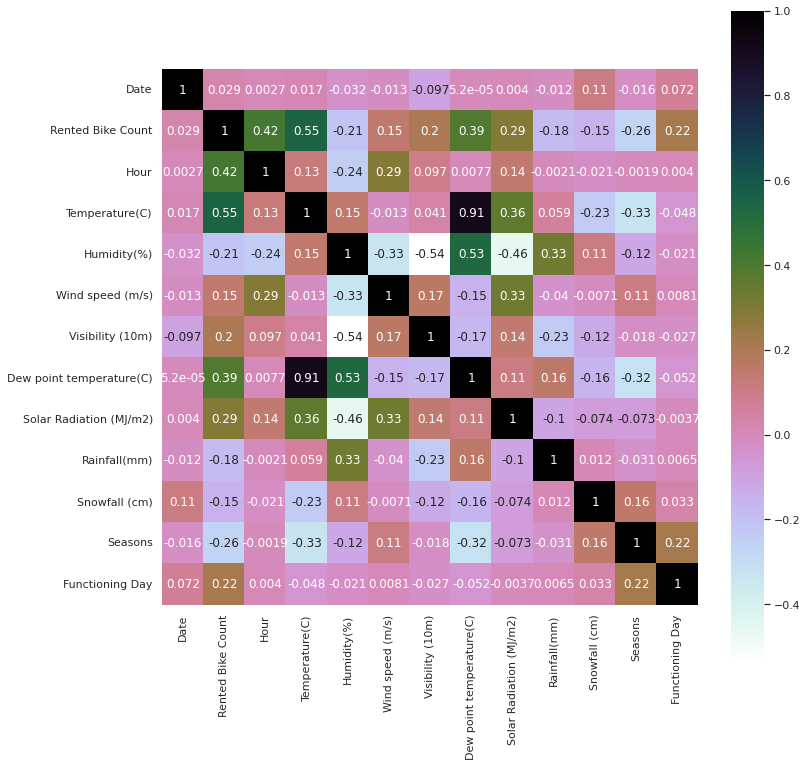

In [358]:
plt.figure(figsize=(12,12))
sns.heatmap(data_corr, annot=True, cmap='cubehelix_r',square=True)
plt.show()

Selecting features with absolute correlation value greater than or equal to 0.3

In [359]:
data_corr = data_corr['Rented Bike Count'][:-1]
data_corr[abs(data_corr)>=0.30].sort_values(ascending = True)


Dew point temperature(C)    0.390193
Hour                        0.419888
Temperature(C)              0.554535
Rented Bike Count           1.000000
Name: Rented Bike Count, dtype: float64

In [360]:
data_corr

Date                        0.028843
Rented Bike Count           1.000000
Hour                        0.419888
Temperature(C)              0.554535
Humidity(%)                -0.213383
Wind speed (m/s)            0.148777
Visibility (10m)            0.203493
Dew point temperature(C)    0.390193
Solar Radiation (MJ/m2)     0.288858
Rainfall(mm)               -0.182435
Snowfall (cm)              -0.153492
Seasons                    -0.264631
Name: Rented Bike Count, dtype: float64

# Splitting dataset into train and test

In [361]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.25)

In [362]:
train_x = train.drop(['Rented Bike Count'],axis = 1)
train_y = train['Rented Bike Count']

test_x = test.drop(['Rented Bike Count'],axis = 1)

test_y = test['Rented Bike Count']

In [363]:
print('Dimension of train_x dataframe: ',train_x.shape)
print('Dimension of train_y dataframe: ',train_y.shape)
print('Dimension of val_x dataframe',test_x.shape)
print('Dimension of val_y dataframe',test_y.shape)

Dimension of train_x dataframe:  (6449, 12)
Dimension of train_y dataframe:  (6449,)
Dimension of val_x dataframe (2150, 12)
Dimension of val_y dataframe (2150,)


In [364]:
from sklearn.linear_model import LinearRegression
ln_reg = LinearRegression()
ln_reg.fit(train_x, train_y)

LinearRegression()

# Accuracy of model:

In [368]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df_pred = ln_reg.predict(test_x)

print('R_Squared Score of linear regression:', r2_score(test_y,df_pred))

R_Squared Score of linear regression: 0.5844798518190301


Trying Ridge(L2) Regression

In [366]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge

ridge.fit(train_x,train_y)
ridge_score = ridge.score(test_x,test_y)
coeff_used = np.sum(ridge.coef_ != 0)

print("training score",ridge_score)
print("number of feature used:",coeff_used)

training score 0.5845207242811494
number of feature used: 12


Lasso (L1) Regression

In [367]:
from sklearn.linear_model import Lasso 
lasso = Lasso()
lasso

lasso.fit(train_x,train_y)
lasso_score = lasso.score(test_x, test_y)
coeff_used = np.sum(lasso.coef_ != 0)
lasso.coef_

print("training score",lasso_score)
print("number of feature used:",coeff_used)

training score 0.5846280452360793
number of feature used: 12
